# Data Analysis Project Life Cycle
- **Business Problem Understanding**
- **Data Collection**
- **Data Pre-processing**
- **Exploratory Data Analysis**
- **Reporting**
## Business Problem
**Client wants us to analyze Flight Fares data in order to understand the trend, insights, top rated flight, categories, zones so that they can prepare better to improve the maintanance.**
## Data Collection
- Client has provided historial data in csv file
- Link: C:\Users\V\Downloads\Flight_Data.csv

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading the dataset
data = pd.read_csv("C:\\Users\\V\\Downloads\\Flight_Data.csv",low_memory=False, encoding='unicode_escape')

In [3]:
# Creating a copy of the dataset
df= data.copy()

## Data Pre-processing
- **Data Profiling**
- **Data Cleaning**
- **Data Consistancy**
- **Data Formating**
- **Outlier Detection & Removal**


In [4]:
df.shape

(301206, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301206 entries, 0 to 301205
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        301206 non-null  int64  
 1   airline           300754 non-null  object 
 2   flight            301206 non-null  object 
 3   source_city       301206 non-null  object 
 4   departure_time    301206 non-null  object 
 5   stops             301206 non-null  object 
 6   arrival_time      301206 non-null  object 
 7   destination_city  301206 non-null  object 
 8   class             301006 non-null  object 
 9   duration          300956 non-null  float64
 10  days_left         301206 non-null  int64  
 11  price             301106 non-null  object 
 12  date              358 non-null     object 
dtypes: float64(1), int64(2), object(10)
memory usage: 29.9+ MB


In [6]:
# Null values
null_values = df.isna().sum()
null_values


Unnamed: 0               0
airline                452
flight                   0
source_city              0
departure_time           0
stops                    0
arrival_time             0
destination_city         0
class                  200
duration               250
days_left                0
price                  100
date                300848
dtype: int64

In [7]:

null_values_percentage = (df.isna().sum()/(df.shape[0]))*100
null_values_percentage
pd.concat([null_values, null_values_percentage], axis =1)

,0,1
Unnamed: 0,0,0.000000
airline,452,0.150063
flight,0,0.000000
source_city,0,0.000000
departure_time,0,0.000000
stops,0,0.000000
arrival_time,0,0.000000
destination_city,0,0.000000
class,200,0.066400
duration,250,0.083000


In [8]:
# All columns
all_columns = df.columns
all_columns


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price', 'date'],
      dtype='object')

In [9]:
# Numeric columns
numeric_columns = df.select_dtypes(include = np.number).columns
numeric_columns


Index(['Unnamed: 0', 'duration', 'days_left'], dtype='object')

In [10]:
# Non-Numeric columns
non_numeric_columns = df.select_dtypes(include = object).columns
non_numeric_columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'price', 'date'],
      dtype='object')

In [11]:
# Duplicate values
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
301201    False
301202    False
301203    False
301204    False
301205    False
Length: 301206, dtype: bool

In [12]:
# Filtering out the duplicate entries
df = df[~df.duplicated()]
df[df.duplicated()]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date



### Data Profiling
1. **Date**
    - So many values are missing therefore, we are dropping date column
     
2. **Unnamed: 0**
    - No data, therefore it should be dropped.
      
3. **Class**
    - Filling the missing values with the mode value.
    
4. **Duration**
    -  Filling the missing values with the mean value.
    -  Removing the outliers.
5. **Airline**
    -  Filling the missing values with the mode value.
6. **Price**
    -  Filling the missing values with the mode value.
    -  Removing the outliers.



### Data Cleaning

### Unnamed: 0

In [13]:

# Dropping columns
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    

In [28]:
if 'date' in df.columns:
    df.drop(['date'], axis=1, inplace=True)
    

In [29]:
# Impute missing values with the most frequent class
df['class'].fillna(df['class'].mode()[0], inplace=True)

In [30]:
df['duration'].fillna(df['duration'].mean(), inplace=True)

In [31]:
df['airline'].fillna(df['airline'].mode()[0], inplace=True)

In [32]:
df['price'] = pd.to_numeric(df['price'], errors = 'coerce') 

In [33]:
df['price'].fillna(df['price'].mean(), inplace=True)  

### Remove Outliers

In [34]:
df.describe()

,duration,days_left,price
count,298923.000000,298923.000000,298923.000000
mean,12.081569,26.081262,20976.300614
std,6.992492,13.550823,22707.068868
min,0.830000,1.000000,1105.000000
25%,6.750000,15.000000,4779.000000
50%,11.170000,26.000000,7425.000000
75%,16.000000,38.000000,42521.000000
max,30.170000,49.000000,99129.000000


## Duration

In [35]:
Q1_order = np.quantile(df['duration'], 0.25)
Q3_order = np.quantile(df['duration'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order
# Removing the outliers
df = df[(df['duration'] > lower_limit_order) & (df['duration'] < upper_limit_order)]


## Price

In [36]:
# Quartile
Q1_order = np.quantile(df['price'], 0.25)
Q3_order = np.quantile(df['price'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order
# Removing the outliers
df = df[(df['price'] > lower_limit_order) & (df['price'] < upper_limit_order)]


## Days_left

In [37]:
# Quartile
Q1_order = np.quantile(df['days_left'], 0.25)
Q3_order = np.quantile(df['days_left'], 0.75)
IQR_order = Q3_order - Q1_order
#IQR_order
lower_limit_order = Q1_order - 1.5*IQR_order
upper_limit_order = Q3_order + 1.5*IQR_order
# Removing the outliers
df = df[(df['days_left'] > lower_limit_order) & (df['days_left'] < upper_limit_order)]


Text(0.5, 1.0, "Box plot for 'Days_left'")

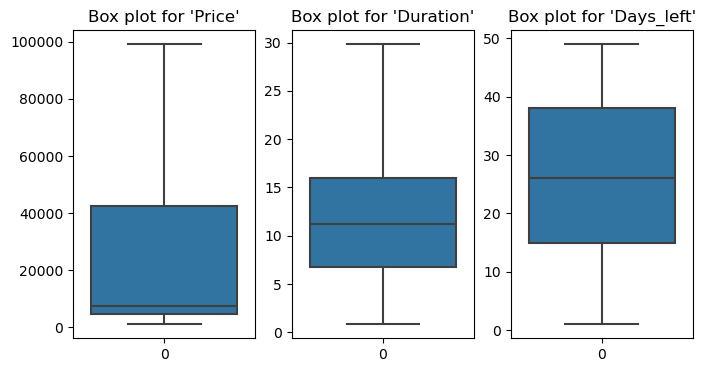

In [38]:
# Visulaization of outliers
fig,ax = plt.subplots(1,3, figsize = (8,4))
sns.boxplot(data = df['price'], ax = ax[0])
ax[0].set_title("Box plot for 'Price'")

sns.boxplot(data = df['duration'], ax = ax[1])
ax[1].set_title("Box plot for 'Duration'")
sns.boxplot(data = df['days_left'], ax = ax[2])
ax[2].set_title("Box plot for 'Days_left'")


In [39]:
df.shape

(298697, 11)

In [40]:
# Saving the cleaned data
df.to_excel("Flight_Data_Cleaned.xlsx", index=False )

# Data Visualization
### Airlines Wise Analysis


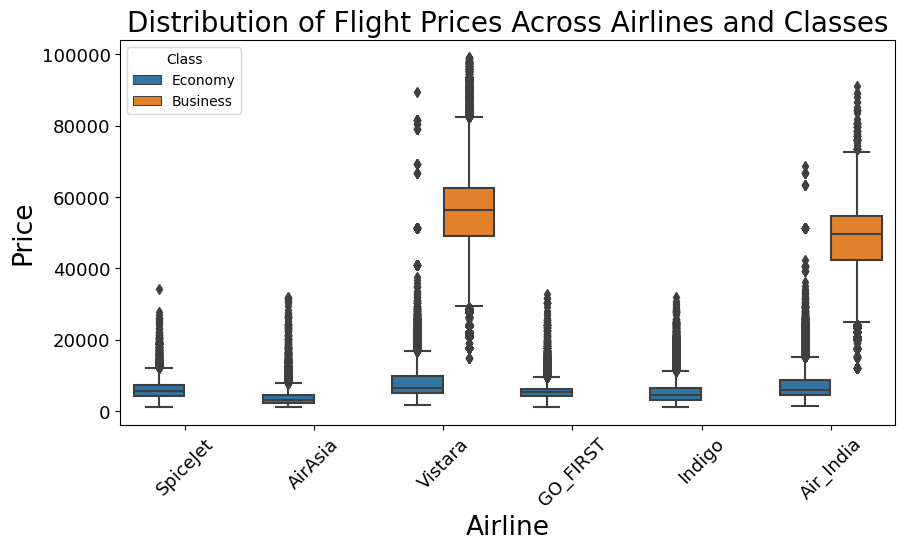

In [42]:
#  Box Plot: Distribution of flight prices across different airlines and classes
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='airline', y='price', hue='class')
plt.title('Distribution of Flight Prices Across Airlines and Classes',fontsize=20)
plt.xlabel('Airline',fontsize=19)
plt.ylabel('Price',fontsize=19)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Class')
plt.show()

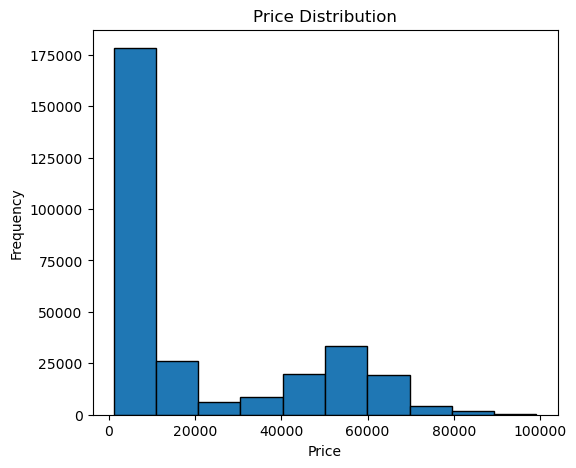

In [48]:
# Price Distribution
plt.figure(figsize=(6,5))
plt.hist(df['price'], bins=10, edgecolor='black',)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


In [50]:
# Plot data
data_airline_wise_amount = df.groupby(['airline'], as_index = False)['flight'].count()
data_airline_wise_amount

,airline,flight
0,AirAsia,16098
1,Air_India,79537
2,GO_FIRST,23173
3,Indigo,43120
4,SpiceJet,9011
5,Vistara,127758


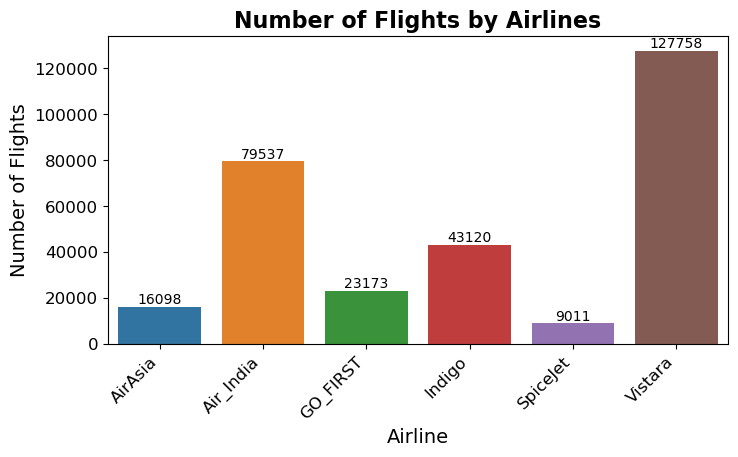

In [51]:
# Create the bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='airline', y='flight', data=data_airline_wise_amount)
plt.title('Number of Flights by Airlines', fontsize=16, fontweight='bold')
for index, row in data_airline_wise_amount.iterrows():
    plt.text(index, row['flight'], str(row['flight']), ha='center', va='bottom', fontsize=10)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

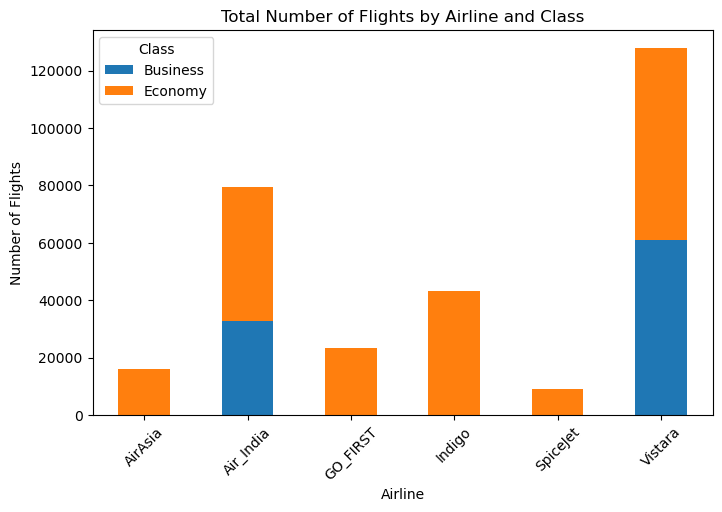

In [57]:
# Process the data for stacked bar chart
stacked_data = df.groupby(['airline', 'class']).size().unstack().fillna(0)

# Plotting the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Total Number of Flights by Airline and Class')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Class')
plt.show()


In [91]:
data_class_wise_count = df.groupby(['class'], as_index = False)['flight'].count()
data_class_wise_count
data_class_wise_price = df.groupby(['class'], as_index = False)['price'].sum()
data_class_wise_price 


,class,price
0,Business,4.920268e+09
1,Economy,1.345856e+09


Text(0.5, 1.0, 'Class Wise Flight Price')

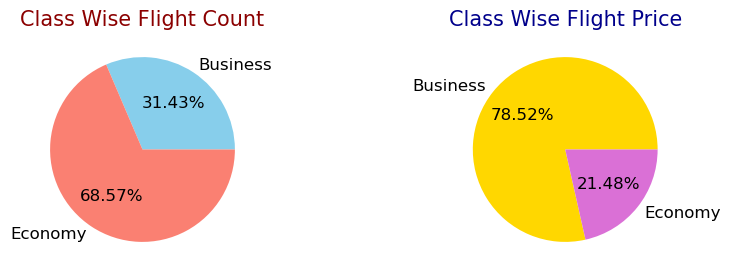

In [104]:
fig,ax=plt.subplots(1,2,figsize = (10,3))
# Pie Chart
ax[0].pie(x = data_class_wise_count['flight'], 
           labels = data_class_wise_count['class'], autopct = "%1.2f%%",colors=['skyblue', 'salmon', 'limegreen'],textprops={'fontsize': 12})
ax[0].set_title("Class Wise Flight Count",fontsize=15,color='darkred')

ax[1].pie(x = data_class_wise_price['price'], 
           labels = data_class_wise_price['class'], autopct = "%1.2f%%",colors=['gold', 'orchid', 'lightcoral'],textprops={'fontsize': 12})
ax[1].set_title("Class Wise Flight Price",fontsize=15,color='darkblue')




In [106]:
data_class_wise_avgprice = df.groupby(['class'], as_index = False)['price'].mean()
data_class_wise_avgprice

,class,price
0,Business,52409.629340
1,Economy,6571.049319


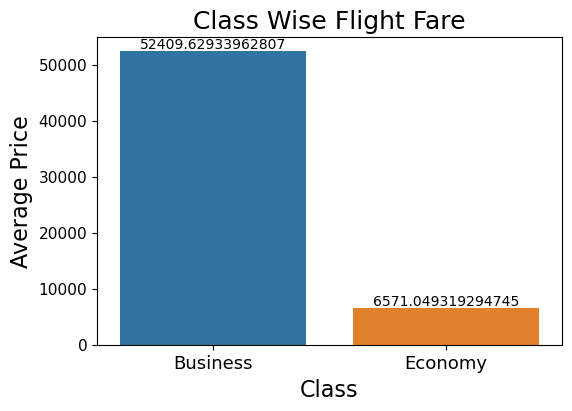

In [113]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'class', y = 'price', data = data_class_wise_avgprice)
plt.title("Class Wise Flight Fare",fontsize=18)
for index, row in data_class_wise_avgprice.iterrows():
    plt.text(index, row['price'], str(row['price']), ha='center', va='bottom', fontsize=10)
plt.xlabel("Class",fontsize=16)
plt.ylabel("Average Price",fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
plt.show()

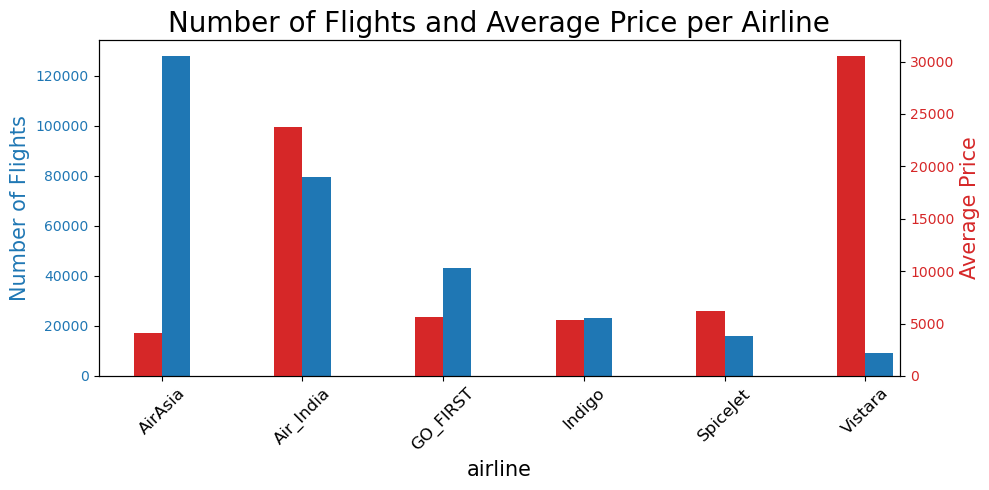

In [167]:
flight_counts = df['airline'].value_counts()
avg_prices = df.groupby('airline')['price'].mean()

# Create the combo chart
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for the count of flights
color = 'tab:blue'
ax1.set_xlabel('Airline',fontsize=15)
ax1.set_ylabel('Number of Flights', color=color,fontsize=15)
flight_counts.plot(kind='bar', ax=ax1, color=color, position=0, width=0.2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(flight_counts.index, rotation=45,fontsize=12)

# Create a second y-axis to plot the line chart
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Price', color=color,fontsize=15)
avg_prices.plot(kind='bar', ax=ax2, color=color,position=1,width=0.2)
ax2.tick_params(axis='y', labelcolor=color)

# Add title
plt.title('Number of Flights and Average Price per Airline',fontsize=20)
fig.tight_layout()  

# Show the plot
plt.show()

In [168]:
data_destination_wise = df.groupby(['destination_city'], as_index = False)['flight'].count()
data_destination_wise

,destination_city,flight
0,Bangalore,50681
1,Chennai,39960
2,Delhi,57133
3,Hyderabad,43319
4,Kolkata,49116
5,Mumbai,58488


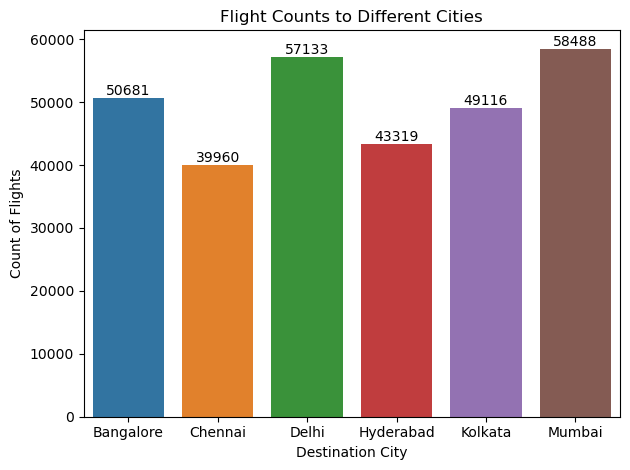

In [169]:
sns.barplot(x='destination_city', y='flight', data=data_destination_wise)

# Add value labels to the bars
for index, row in data_destination_wise.iterrows():
    plt.text(index, row['flight'], str(row['flight']), ha='center', va='bottom', fontsize=10)

# Adding titles and labels
plt.title('Flight Counts to Different Cities')
plt.xlabel('Destination City')
plt.ylabel('Count of Flights')

# Display the plot
plt.tight_layout()
plt.show()

In [170]:
data_stops_class_wise = df.groupby(['stops', 'class'], as_index=False)['price'].mean()
data_stops_class_wise

,stops,class,price
0,one,Business,54557.360203
1,one,Economy,6838.455906
2,two_or_more,Business,69627.137827
3,two_or_more,Economy,8949.935105
4,zero,Business,27838.416060
5,zero,Economy,4012.624615


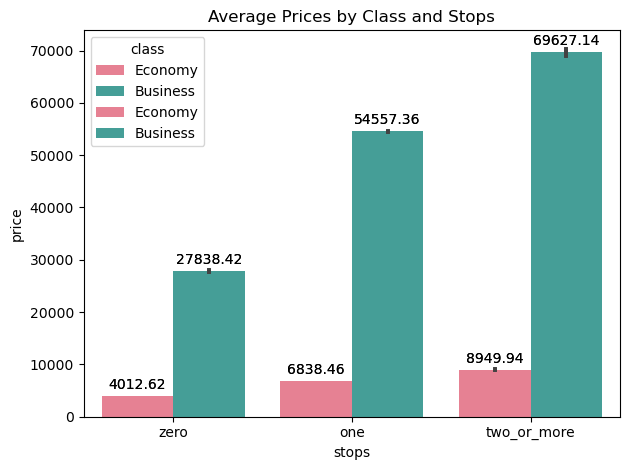

In [181]:
sns.barplot(x='stops', y='price', hue='class', data=df, palette='husl')

# Customize the plot
plt.xlabel('Stops')
plt.ylabel('Price')
plt.title('Average Prices by Class and Stops')
ax = sns.barplot(x='stops', y='price', hue='class', data=df, palette='husl')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',  # Format the label to two decimal places
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # Offset for positioning the label
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
# Display the graph
plt.tight_layout()
plt.show()

In [172]:
data_stops_wise = df.groupby(['stops'], as_index=False)['flight'].count()
data_stops_wise

,stops,flight
0,one,250291
1,two_or_more,12397
2,zero,36009


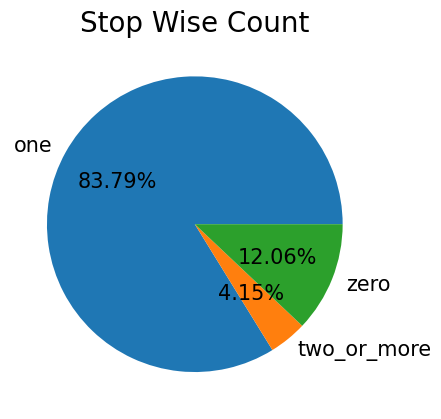

In [182]:
# Pie Chart
plt.pie(x=data_stops_wise['flight'], labels=data_stops_wise['stops'], autopct="%1.2f%%", textprops={'fontsize': 15})
plt.title("Stop Wise Count", fontsize=20)
plt.show()

C:\Users\V\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


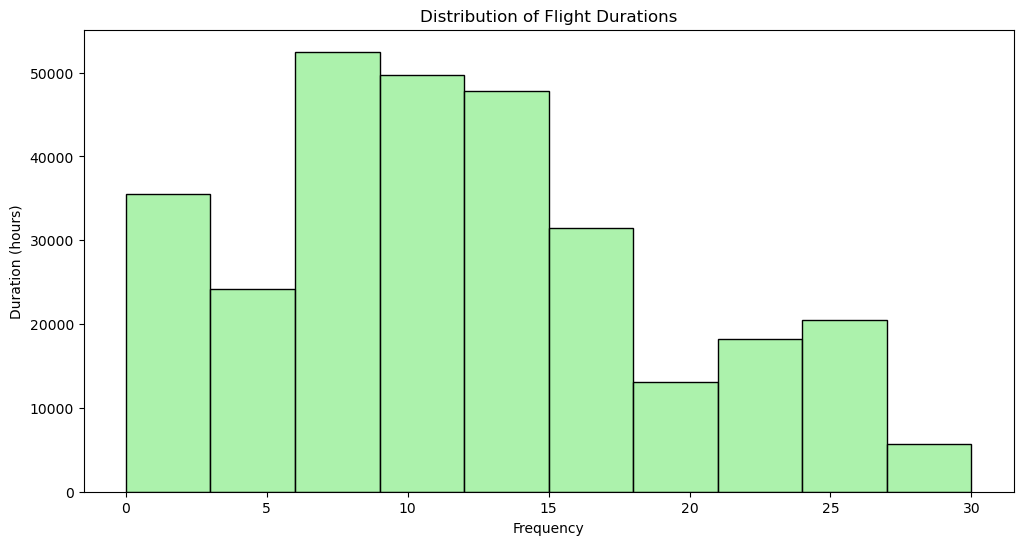

In [186]:
custom_bins = list(range(0,31,3))  # Adjust as needed

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='duration', bins=custom_bins, kde=False, element='bars', fill=True, color='lightgreen')
plt.title('Distribution of Flight Durations')
plt.xlabel('Frequency')
plt.ylabel('Duration (hours)')
plt.show()


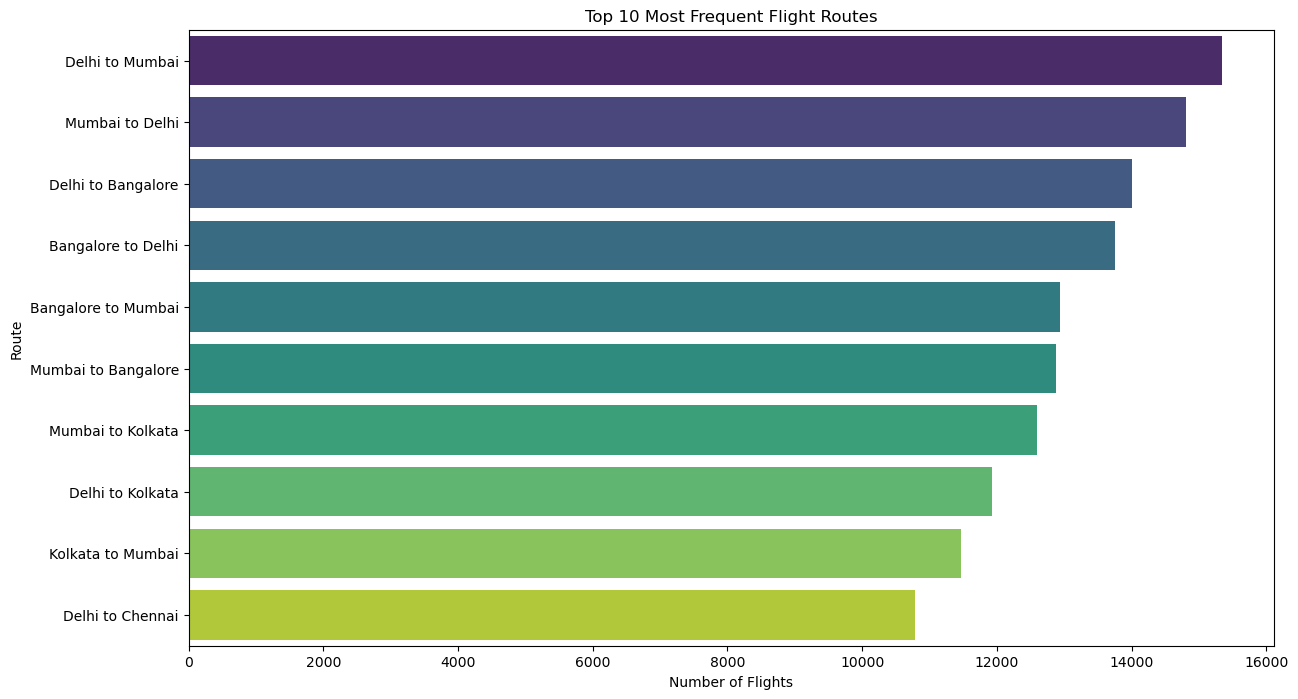

In [187]:
route_counts = data.groupby(['source_city', 'destination_city']).size().reset_index(name='FlightCount')

# Sort by the number of flights in descending order and select the top routes
top_routes = route_counts.sort_values(by='FlightCount', ascending=False).head(10)

# Plotting the top routes
plt.figure(figsize=(14, 8))
sns.barplot(x='FlightCount', y=top_routes.apply(lambda row: f"{row['source_city']} to {row['destination_city']}", axis=1), data=top_routes, palette='viridis')
plt.title('Top 10 Most Frequent Flight Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Route')
plt.show()

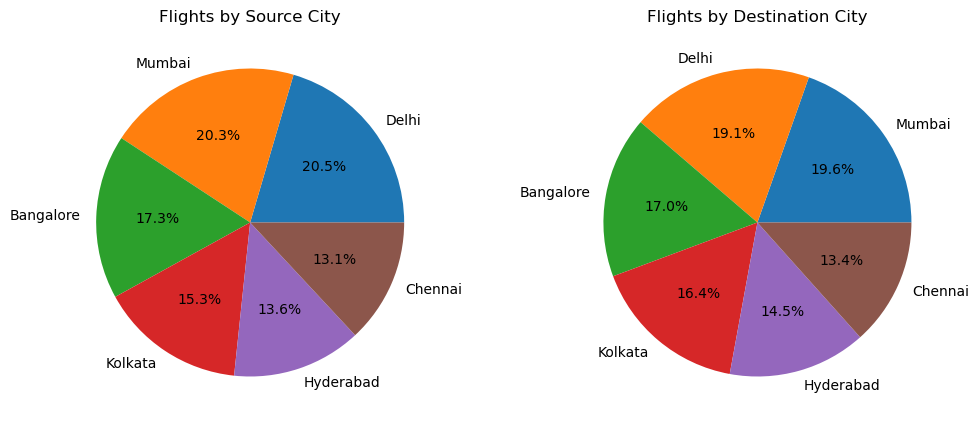

In [188]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
source_city_counts = df['source_city'].value_counts()
dest_city_counts = df['destination_city'].value_counts()
ax[0].pie(source_city_counts, labels=source_city_counts.index, autopct='%1.1f%%')
ax[0].set_title('Flights by Source City')
ax[1].pie(dest_city_counts, labels=dest_city_counts.index, autopct='%1.1f%%')
ax[1].set_title('Flights by Destination City')
plt.show()


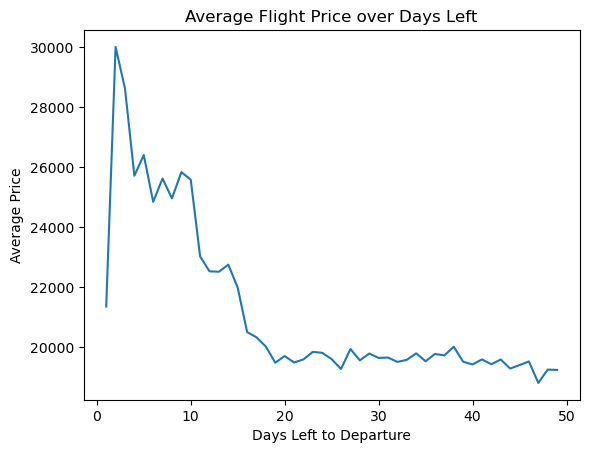

In [189]:
avg_price_by_days = df.groupby('days_left')['price'].mean()
plt.plot(avg_price_by_days.index, avg_price_by_days.values)
plt.xlabel('Days Left to Departure')
plt.ylabel('Average Price')
plt.title('Average Flight Price over Days Left')
plt.show()


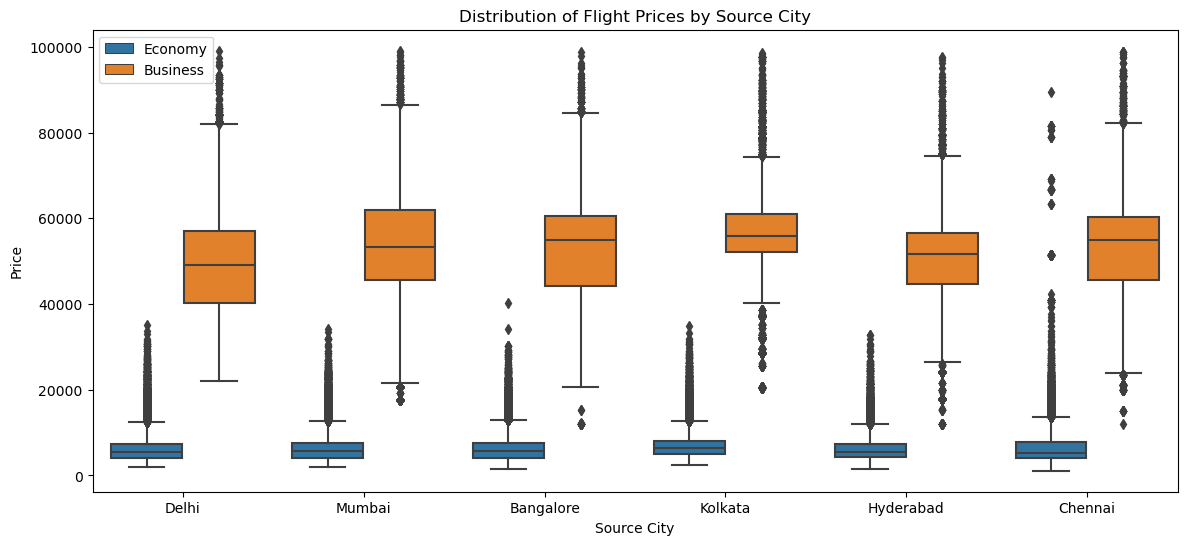

In [178]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='source_city', y='price', hue='class')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.title('Distribution of Flight Prices by Source City')
plt.legend(loc='upper left')
plt.show()


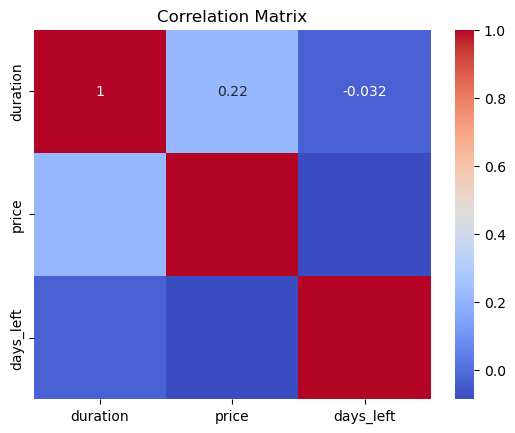

In [179]:
corr_matrix = df[['duration', 'price', 'days_left']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
